In [1]:
#Data from
# https://www.kaggle.com/datasets/preethamgouda/financial-risk/data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [105]:
df=pd.read_csv('/content/financial_risk_assessment.csv')

In [106]:
df.shape

(15000, 20)

In [107]:
df.head()

,Age,Gender,Education_Level,Marital_Status,Income,Credit_Score,Loan_Amount,Loan_Purpose,Employment_Status,Years_at_Current_Job,Payment_History,Debt-to-Income_Ratio,Assets_Value,Number_of_Dependents,City,State,Country,Previous_Defaults,Marital_Status_Change,Risk_Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [108]:
df.dtypes

,0
Age,int64
Gender,object
Education_Level,object
Marital_Status,object
Income,float64
Credit_Score,float64
Loan_Amount,float64
Loan_Purpose,object
Employment_Status,object
Years_at_Current_Job,int64


In [109]:
df1 = df

In [110]:
# Iterate through columns to find and process categorical columns
for col in df1.columns:
    if df1[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df1[col]):
        # Unique values present in the data
        unique_values = df1[col].unique()
        print(f"Unique values in column '{col}' (Categorical): {unique_values}")
    else:
        # Skip non-categorical columns
        print(f"Column '{col}' is not categorical")

Column 'Age' is not categorical
Unique values in column 'Gender' (Categorical): ['Male' 'Female' 'Non-binary']
Unique values in column 'Education_Level' (Categorical): ['PhD' "Bachelor's" "Master's" 'High School']
Unique values in column 'Marital_Status' (Categorical): ['Divorced' 'Widowed' 'Single' 'Married']
Column 'Income' is not categorical
Column 'Credit_Score' is not categorical
Column 'Loan_Amount' is not categorical
Unique values in column 'Loan_Purpose' (Categorical): ['Business' 'Auto' 'Home' 'Personal']
Unique values in column 'Employment_Status' (Categorical): ['Unemployed' 'Employed' 'Self-employed']
Column 'Years_at_Current_Job' is not categorical
Unique values in column 'Payment_History' (Categorical): ['Poor' 'Fair' 'Excellent' 'Good']
Column 'Debt-to-Income_Ratio' is not categorical
Column 'Assets_Value' is not categorical
Column 'Number_of_Dependents' is not categorical
Unique values in column 'City' (Categorical): ['Port Elizabeth' 'North Catherine' 'South Scott' ...

<ipython-input-110-d30bbfe611d8>:3: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



In [111]:
# Check for missing values in the dataset
missing_data = df1.isnull().sum()
missing_data

,0
Age,0
Gender,0
Education_Level,0
Marital_Status,0
Income,2250
Credit_Score,2250
Loan_Amount,2250
Loan_Purpose,0
Employment_Status,0
Years_at_Current_Job,0


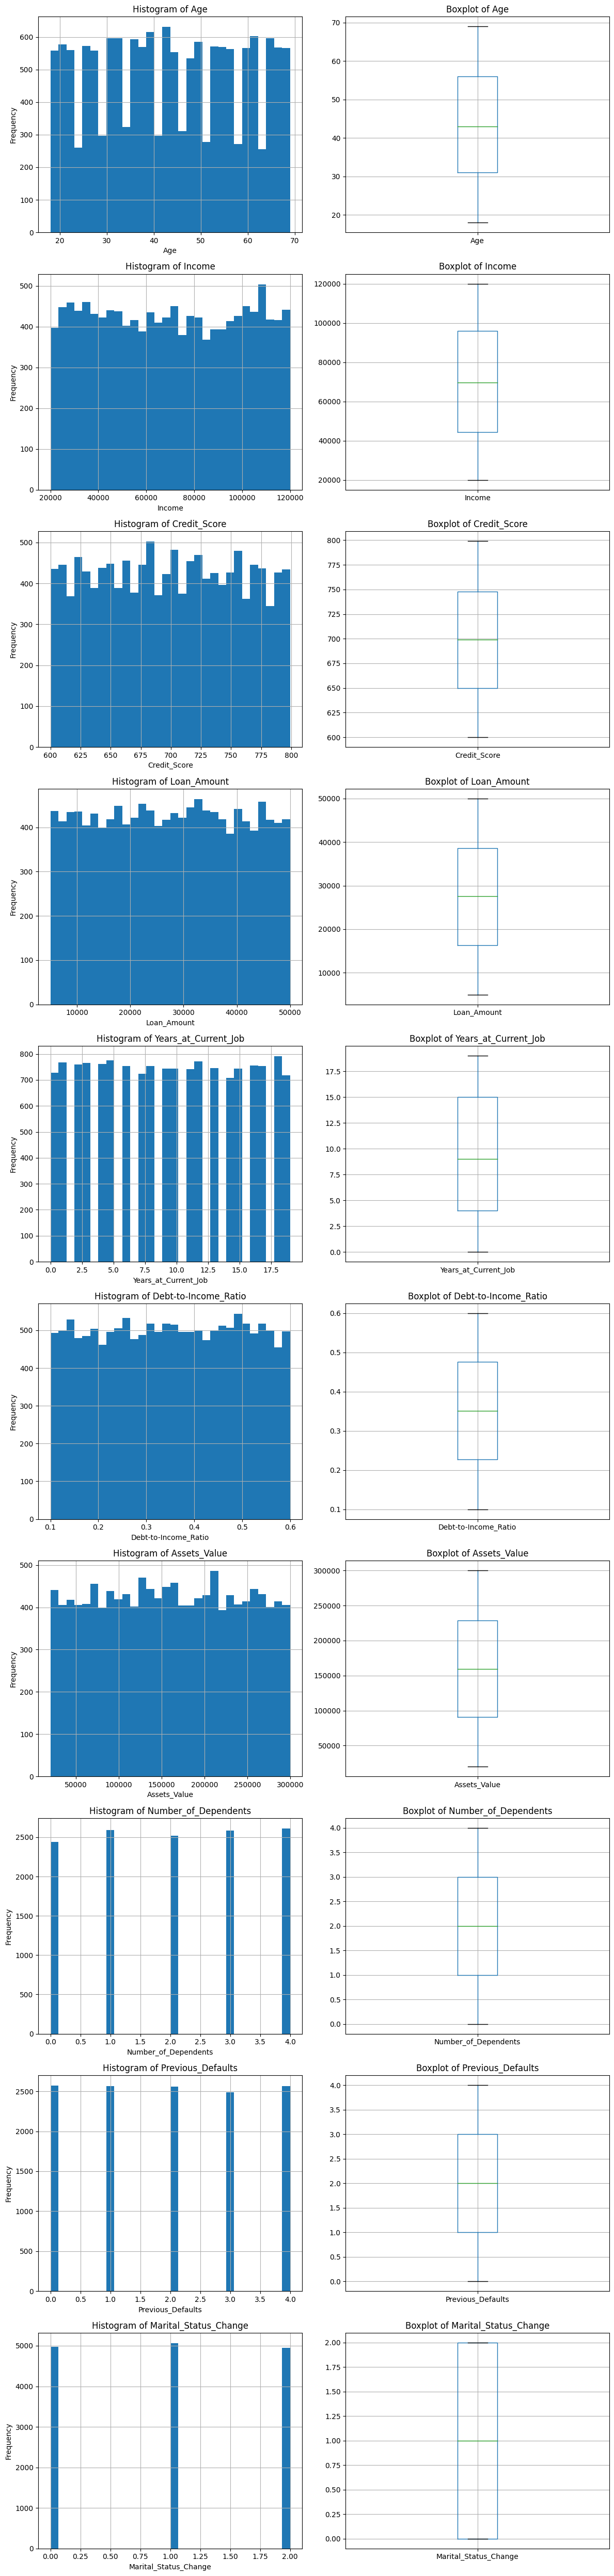

In [112]:
# Identifying all numerical columns
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns

# Plotting histograms and boxplots for all numerical columns
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 5 * len(numerical_columns)))

for i, col in enumerate(numerical_columns):
    df1[col].hist(ax=axes[i, 0], bins=30)
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    df1.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [113]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [114]:
# Create Plotly subplots for histograms and boxplots for all numerical columns
fig = make_subplots(rows=len(numerical_columns), cols=2, subplot_titles=[f"{col} Distribution" for col in numerical_columns for _ in range(2)],
                    specs=[[{"type": "histogram"}, {"type": "box"}] for _ in numerical_columns])

for i, col in enumerate(numerical_columns):
    # Histograms
    fig.add_trace(go.Histogram(x=df1[col], nbinsx=30, name=f'{col} Histogram'), row=i+1, col=1)
    # Boxplots
    fig.add_trace(go.Box(y=df1[col], name=f'{col} Boxplot'), row=i+1, col=2)

fig.update_layout(height=300 * len(numerical_columns), width=1000, showlegend=False)
fig.show()


In [115]:
# Identify numerical columns
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness and kurtosis for numerical columns
skewness = df1[numerical_columns].skew().sort_values()
kurtosis = df1[numerical_columns].kurtosis().sort_values()

# Display skewness and kurtosis
skewness_kurtosis = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
skewness_kurtosis

,Skewness,Kurtosis
Age,0.013531,-1.185098
Assets_Value,0.001629,-1.184473
Credit_Score,0.006441,-1.182102
Debt-to-Income_Ratio,-0.011435,-1.197879
Income,0.010370,-1.237062
Loan_Amount,-0.001424,-1.187513
Marital_Status_Change,0.002808,-1.489968
Number_of_Dependents,-0.018468,-1.298795
Previous_Defaults,0.012139,-1.302542
Years_at_Current_Job,0.009180,-1.214388


In [116]:
# Identify missing values in the dataset
missing_values = df1.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values


,0
Income,2250
Credit_Score,2250
Loan_Amount,2250
Assets_Value,2250
Number_of_Dependents,2250
Previous_Defaults,2250


In [117]:
from sklearn.impute import KNNImputer

In [118]:
# Redefine columns for KNN imputation
median_impute_cols = ['Income', 'Loan_Amount', 'Assets_Value', 'Credit_Score', 'Previous_Defaults']
mode_impute_cols = ['Number_of_Dependents']

# Initialize the KNN Imputer again with 5 neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Prepare the numerical data for KNN Imputation, ensuring to combine the lists correctly
numerical_data = df1[median_impute_cols + mode_impute_cols]

# Apply the KNN imputer
imputed_data = knn_imputer.fit_transform(numerical_data)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numerical_data.columns)

# Update the original DataFrame with the imputed values
df1.update(imputed_df)

# Verify that imputation was successful
df1.isnull().sum()


,0
Age,0
Gender,0
Education_Level,0
Marital_Status,0
Income,0
Credit_Score,0
Loan_Amount,0
Loan_Purpose,0
Employment_Status,0
Years_at_Current_Job,0


In [70]:
import numpy as np

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve, auc,ConfusionMatrixDisplay,classification_report,recall_score,f1_score

In [72]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.6 MB/s eta 0:00:00


In [73]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.5 MB/s eta 0:00:00


In [119]:
# Re-import necessary libraries in case of session reset
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder, excluding 'Risk_Rating' from the encoder as it's the target variable
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Loan_Purpose', 'Employment_Status',
                        'Payment_History', 'City', 'State', 'Country']

encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
encoded_data = encoder.fit_transform(df1[categorical_features])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical columns from df1 and concatenate the new encoded DataFrame
df1.drop(columns=categorical_features, inplace=True)
df1_encoded = pd.concat([df1, encoded_df], axis=1)

# Display the first few rows to confirm the encoding
df1_encoded.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,Age,Income,Credit_Score,Loan_Amount,Years_at_Current_Job,Debt-to-Income_Ratio,Assets_Value,Number_of_Dependents,Previous_Defaults,Marital_Status_Change,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,49,72799.0,688.0,45713.0,19,0.154313,120228.0,0.0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57,50079.2,690.0,33835.0,6,0.148920,55849.0,0.0,3.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21,55687.0,600.0,36623.0,8,0.362398,180700.0,3.0,3.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,59,26508.0,622.0,26541.0,2,0.454964,157319.0,3.0,4.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25,49427.0,766.0,36528.0,10,0.143242,287140.0,1.6,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Include additional classifiers like SVM, K-Nearest Neighbors in your tuning function
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def hyperparameter_tuning(X_train, y_train):
    models = {
        'LogisticRegression': {
            'model': LogisticRegression(random_state=42, class_weight='balanced'),
            'params': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
        },
        'RandomForest': {
            'model': RandomForestClassifier(random_state=42, class_weight='balanced'),
            'params': {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
        },
        'GradientBoosting': {
            'model': GradientBoostingClassifier(random_state=42),
            'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
        },
        'SVM': {
            'model': SVC(random_state=42),
            'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
        },
        'KNeighbors': {
            'model': KNeighborsClassifier(),
            'params': {'n_neighbors': [3, 5, 7]}
        }
    }

    scores = []
    for model_name, mp in models.items():
        clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        clf.fit(X_train, y_train)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })
    return scores

# Run the tuning
tuning_results = hyperparameter_tuning(X_train, y_train)
print(tuning_results)


NameError: name 'X' is not defined

In [122]:
# Check for remaining NaN values
print(df1_encoded_sparse.isnull().sum())

# Apply median imputation for any remaining NaNs
for column in df1_encoded_sparse.columns:
    if df1_encoded_sparse[column].isnull().any():
        median_value = df1_encoded_sparse[column].median()
        df1_encoded_sparse[column].fillna(median_value, inplace=True)

# Re-split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1_encoded_sparse.drop('Risk_Rating', axis=1), df1_encoded_sparse['Risk_Rating'], test_size=0.2, random_state=42)

# Re-train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predict and evaluate the model again
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


NameError: name 'df1_encoded_sparse' is not defined